In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part I - Basic Data Exploration

Load the dataset

In [2]:
path_to_dataset = "googleplaystore.csv"
google_play_store_df = pd.read_csv(path_to_dataset)

Display first 10 samples, using `.head(`) method

In [3]:
google_play_store_df.head(n=10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In EDA projects, I always like to see the column names using `.columns` attribute, rather than seeing it from table above.

In [4]:
google_play_store_df.columns.to_list()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [5]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
google_play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
print(f'There are {len(google_play_store_df)} samples in the dataset.')

There are 10841 samples in the dataset.


# Part II - Missing Values and Data Types

As I inspect the results of `google_play_store_df.head(n=10)` and `google_play_store_df.info()`, I observed the following:

- The first thing my eye caught is that there is only one feature kept as `float64` `(Rating`)

- Every other features are kept as `object`. I know that the pandas keep `str` datatype as `object` in `dataframes`. However, even though the `Price` is something that is numerical in our life, it stored as `object`. Moreover, there are more quantative features as well, like `Reviews`, `Size` and `Installs`. Thanks to the flexibility of Python, (if needed), I can convert those into numerical (e.g., I can define a function that maps the "19M" to 19.000.000.000).

- There are total of 10841 rows in the dataset. However, there are some missing values, based on the results of `.info()` method call. For example, there are 10841-9367=1474 missing values for `Rating` column.

## 2.1. Check missing values

In [8]:
# I count missing values in each column of dataset, and store them in a dictionary
# keys: column names, corresponding values: count of missing values in that column
def get_missing_values_count_dict(df):
  results_dict = {}
  for col in google_play_store_df.columns:
    results_dict[col] = int(google_play_store_df[col].isna().sum())
  return results_dict

get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 1474,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 1,
 'Price': 0,
 'Content Rating': 1,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 3}

There are lots of missing values for Rating column. Let's find the percentage.

In [9]:
missing_rating_percentage = google_play_store_df["Rating"].isna().sum() / len(google_play_store_df) * 100
missing_rating_percentage = round(float(missing_rating_percentage), 2)
missing_rating_percentage

13.6


Also let's take a look at the other columns with missing values

In [10]:
missing_value_count_dict = get_missing_values_count_dict(google_play_store_df)

# List of column names with missing values
keys_missing_values = [key for key in missing_value_count_dict.keys() if missing_value_count_dict[key] != 0]

# Remove "Rating" from the list
keys_missing_values.remove("Rating")

keys_missing_values

['Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [11]:
google_play_store_df[keys_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            10840 non-null  object
 1   Content Rating  10840 non-null  object
 2   Current Ver     10833 non-null  object
 3   Android Ver     10838 non-null  object
dtypes: object(4)
memory usage: 338.9+ KB


Let's take a look at some samples with missing values, based on different features

In [12]:
google_play_store_df[google_play_store_df["Type"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [13]:
google_play_store_df[google_play_store_df["Content Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
google_play_store_df[google_play_store_df["Current Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [15]:
google_play_store_df[google_play_store_df["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
# Display rows with any missing values
google_play_store_df[google_play_store_df.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


## 2.2. Identify data types

In [17]:
google_play_store_df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


## 2.3. Check if each column has an appropriate data type.

In [18]:
google_play_store_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


• The first thing my eye caught is that there is only one feature kept as `float64` (Rating)


• Every other features are kept as `object`. I know that the pandas keep `str` datatype as `object` in dataframes. However, even though the Price is something that is numerical in our life, it stored as `object`. Moreover, there are more quantative features as well, like Reviews, Size and Installs. Thanks to the flexibility of Python, (if needed), I can convert those into numerical (e.g., I can define a function that maps the "19M" to 19.000.000.000).

## 2.4. Inspect categorical vs numerical columns

Note that I haven't done the necessary type conversions **yet**.

e.g., Size and Reviews columns must be converted to numerical data types.

In [19]:
# Create list of numerical and categorical columns
numerical_columns = google_play_store_df.select_dtypes(include="number").columns.to_list()
categorical_columns = google_play_store_df.select_dtypes(exclude="number").columns.to_list()

In [20]:
numerical_columns

['Rating']

In [21]:
categorical_columns

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [22]:
google_play_store_df[numerical_columns].head(3)

,Rating
0,4.1
1,3.9
2,4.7


In [23]:
google_play_store_df[categorical_columns].head(3)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## 2.5. Verify which columns are suitable for numerical analysis or visualization

In [24]:
# Remember the numerical columns in unmanipulated dataframe
numerical_columns

['Rating']

The only suitable column for numerical analysis or visualization in **unmanipulated dataframe** is Rating.

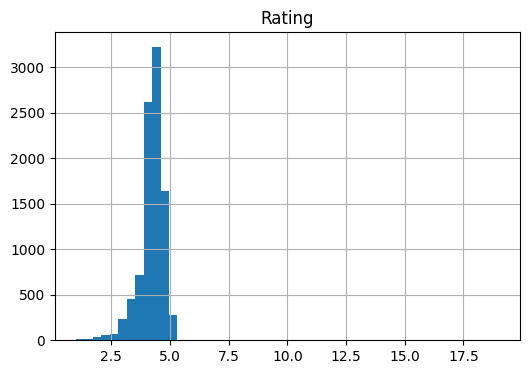

In [25]:
# df.hist() plots a histogram for each numerical attribute in google_play_store_df.
# Since the only numerical column (for now) is Rating, .hist() method only takes account this column.
google_play_store_df.hist(bins=50, figsize=(6, 4))
plt.show()

## 2.6. Handle incorrect datatypes

I noticed that there are duplicate rows in dataset.

In [26]:
# e.g.
google_play_store_df[google_play_store_df["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Remove duplicates from the dataset

In [27]:
old_len = len(google_play_store_df)

google_play_store_df = google_play_store_df.drop_duplicates(subset=["App"], keep="first")

# number of removed duplicates
num_removed_dups = old_len - len(google_play_store_df)

# display it
num_removed_dups

1181

In [28]:
# Since some observations are removed, I reset the index
google_play_store_df = google_play_store_df.reset_index()

In [29]:
google_play_store_df.columns[0]

'index'

In [30]:
# Drop index column
google_play_store_df = google_play_store_df.drop("index", axis=1)

### 2.6.1. Converting Reviews column to numeric

In [31]:
try:
  google_play_store_df["Reviews"] = pd.to_numeric(google_play_store_df["Reviews"])
except ValueError as e:
  print(e)

Unable to parse string "3.0M" at position 9300


However, it seems that there is a string "3.0M" in 10472nd sample.

In [32]:
# Extract the erroneous sample from dataframe
erroneous_sample = google_play_store_df[google_play_store_df["Reviews"] == "3.0M"]

# display it
erroneous_sample

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As I inspected this sample, I noticed that some attributes shifted towards left. But the actual missing data for this observation is "Category". For example, 1.9, which is Category value for this entry is actually Rating of it, and 19.0 is actually its Reviews, Size of it is 3.0M, etc.

For now, I decide to remove it from my dataset. However, I'll keep it in a dictionary so I can manipulate & put it back if I need it later on.

In [33]:
# Extract this sample from the df & store it in a dictionary
erroneous_sample_dict = google_play_store_df.iloc[erroneous_sample.index].to_dict()

# Remove this erroneous sample from df
google_play_store_df = google_play_store_df.drop(axis=0, index=erroneous_sample.index)

In [34]:
# After removing the bad data, convert Reviews column to numeric
google_play_store_df["Reviews"] = pd.to_numeric(google_play_store_df["Reviews"])

### 2.6.2. Converting Size column to numeric


In [35]:
# Display unique values for Size column
google_play_store_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Based on unique values for Size column, I think converting this column to numeric is a little bit more tricky than the Reviews column, because of the two reasons:

- Numerical values are represented as with suffix M or k. (e.g., 170k, 19M)
- Also, there are some samples with Size 'Varies with device'


In [36]:
# Number of samples with Size 'Varies with device'
len(google_play_store_df[google_play_store_df["Size"] == "Varies with device"])

1227

To convert Size feature to numeric, I'm going to follow this idea:

- Define a function that maps the string representations of sizes to their corresponding numeric values. For example, 170k will be mapped to the 170.000 while 19M will be mapped to 19.000.000 . Because pandas provides `apply` method (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).


In [37]:
# Convert string sizes to numeric
# e.g., 170k -> 170.000, 16M -> 16.000.000
def convert_str_size_to_numeric(str_size):
  if pd.isna(str_size):
    return np.nan
  if isinstance(str_size, int) or isinstance(str_size, float):
    return str_size
  if str_size.lower().endswith("k"):
    num_zeros = 3
  elif str_size.lower().endswith("m"):
    num_zeros = 6
  else:
    raise ValueError(f"{str_size} is invalid input.")

  return int(float(str_size[:-1]) * pow(10, num_zeros)) # specified slicing operation removes the last character of string (suffix)

In [38]:
# replace "Varies with device" category with NaN temporarily
google_play_store_df["Size"] = google_play_store_df["Size"].replace("Varies with device", np.nan)

# apply conversion
google_play_store_df["Size"] = google_play_store_df["Size"].apply(convert_str_size_to_numeric)

# compute the median
median_size = google_play_store_df["Size"].median()

# Fill NaN values with the median
google_play_store_df["Size"] = google_play_store_df["Size"].fillna(median_size)

### 2.6.3. Converting Price column to numeric

In [39]:
google_play_store_df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Every value in Price column starts with "$", except "0".

In [40]:
def convert_raw_price_to_numeric(raw_price):
  # exclude $ if the raw_price starts with $
  price = raw_price[1:] if raw_price.startswith("$") else raw_price
  return float(price)

# Apply this custom function to every single row in df
google_play_store_df["Price"] = google_play_store_df["Price"].apply(convert_raw_price_to_numeric)

### Fix small error in dataframe

In [41]:
# Display missing values
get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 1463,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 1,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 2}

There is a single observation with missing Type.

In [42]:
missing_type_row = google_play_store_df[google_play_store_df["Type"].isna()]
missing_type_row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,NaN,0,12000000.0,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [43]:
# Display unique values for Type
google_play_store_df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

For "Command & Conquer: Rivals" App, Price is 0.0, but Type is missing. Indeed, it should be "Free".

In [44]:
# Manipulate this row
google_play_store_df.loc[missing_type_row.index, "Type"] = "Free"

### 2.6.4. Converting Installs Column to numeric

In [45]:
google_play_store_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [46]:
# This function takes str_install as argument, and simply removes "+" suffix and "," symbols (if there is), then returns the result as int
def convert_str_install_to_numeric(str_install):
  if pd.isna(str_install):
    return np.nan
  if isinstance(str_install, int) or isinstance(str_install, float):
    return str_install
  str_install = str_install[:-1] if str_install.endswith("+") else str_install # if there is "+" suffix, remove it
  str_install = str_install.replace(",", "") # remove "," signs just to not get typecasting errors
  return int(str_install)

In [47]:
google_play_store_df["Installs"] = google_play_store_df["Installs"].apply(convert_str_install_to_numeric)

### 2.6.5. Analysis On Rating Column & Filling Missing Values with Median

In [48]:
# Count of missing values in Rating
google_play_store_df["Rating"].isna().sum()

np.int64(1463)

In [49]:
# Percentage of missing values in Rating
round(google_play_store_df["Rating"].isna().sum() / len(google_play_store_df) * 100, 2)

np.float64(15.15)

In [50]:
# Descriptive statistics for Rating
google_play_store_df["Rating"].describe()

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


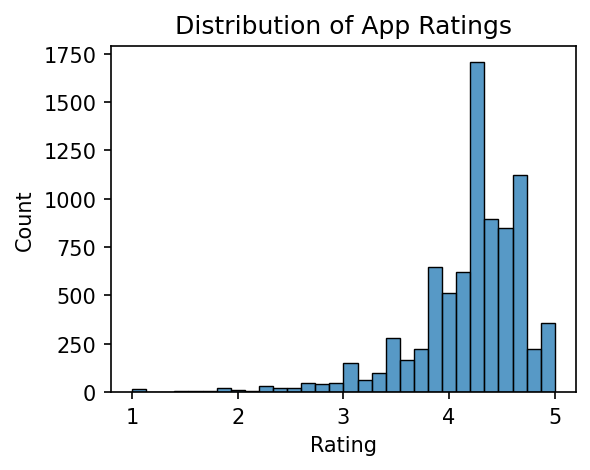

In [51]:
# Visualizing how ratings are distributed using histogram plot
plt.figure(figsize=(4,3), dpi=150)
sns.histplot(google_play_store_df["Rating"], bins=30)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()

To check if the missing Rating values were related to old apps, I looked at the Last Updated column for rows with missing ratings.

In [52]:
# Investigate whether missing Rating values are related to outdated Apps
google_play_store_df[google_play_store_df["Rating"].isna()]["Last Updated"].unique()

array(['March 7, 2018', 'September 20, 2017', 'July 23, 2018',
       'July 17, 2018', 'August 8, 2017', 'December 11, 2017',
       'January 24, 2018', 'July 13, 2018', 'June 15, 2018',
       'August 7, 2015', 'April 9, 2018', 'July 3, 2018',
       'September 1, 2017', 'July 25, 2017', 'August 2, 2018',
       'July 15, 2018', 'July 16, 2018', 'July 20, 2018', 'July 10, 2018',
       'July 26, 2018', 'July 9, 2018', 'July 31, 2018', 'July 27, 2018',
       'July 24, 2018', 'July 14, 2018', 'July 12, 2018', 'July 22, 2018',
       'July 11, 2018', 'August 3, 2018', 'July 30, 2018',
       'July 19, 2018', 'July 2, 2018', 'November 27, 2017',
       'July 4, 2018', 'June 28, 2018', 'July 8, 2018', 'May 30, 2018',
       'August 4, 2018', 'June 22, 2018', 'January 6, 2018',
       'June 23, 2018', 'September 19, 2017', 'December 28, 2017',
       'April 23, 2018', 'February 20, 2018', 'January 16, 2018',
       'January 2, 2017', 'November 5, 2017', 'November 16, 2017',
       'March 2

The update dates ranged from 2012 to 2018, and there was no clear pattern or specific time period.
This shows that the missing ratings are not caused by outdated data, but by apps that were released but not rated by users yet.

Following the guideline from Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (Aurélien Géron, 3rd Edition, p. 68), the least destructive approach to handle missing values is to filling with the median. Therefore, I decided to fill the missing values in the Rating column with the median value of that attribute.

In [53]:
# Fill the missing ratings with median
median_rating = google_play_store_df["Rating"].median()
google_play_store_df["Rating"] = google_play_store_df["Rating"].fillna(median_rating)

### 2.6.6. Missing values in Current Ver and Android Ver

In [54]:
get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 0,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 0,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 8,
 'Android Ver': 2}

Since there are 8 and 2 missing values individually, for Current Ver and Android Ver, I decided to drop these rows since the data loss is very slight. I want my resulting dataset to be as clean as possible.

In [55]:
google_play_store_df = google_play_store_df.dropna(axis=0, subset=["Current Ver", "Android Ver"])

In [56]:
get_missing_values_count_dict(google_play_store_df)

{'App': 0,
 'Category': 0,
 'Rating': 0,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 0,
 'Price': 0,
 'Content Rating': 0,
 'Genres': 0,
 'Last Updated': 0,
 'Current Ver': 0,
 'Android Ver': 0}

No missing values left in dataframe, as it is seen.

### 2.6.7. Missing values in Content Rating
I noticed that there are some "Unrated" values for this feature. It implies the missing values, even though it's not explicitly given as np.nan.

In [57]:
google_play_store_df["Content Rating"].value_counts()

,count
Content Rating,
Everyone,7893
Teen,1036
Mature 17+,393
Everyone 10+,322
Adults only 18+,3
Unrated,2


In [58]:
google_play_store_df[google_play_store_df["Content Rating"] == "Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6267,Best CG Photography,FAMILY,4.3,1,2500000.0,500,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
7189,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


Since there are only 2 samples, I drop them.

In [59]:
indices_to_drop = google_play_store_df[google_play_store_df["Content Rating"] == "Unrated"].index

google_play_store_df = google_play_store_df.drop(indices_to_drop)

## 2.7. Discuss your findings:

- Is the column categorical or numerical?
- Are there missing or zero values that might need cleaning?
- Does the column need conversion before analysis?

### 2.7.1. App
This column is categorical and represents the name of each application. There are no missing values. It does not need any cleaning or conversion, but duplicates were removed earlier to ensure data accuracy.

### 2.7.2. Category
This column is categorical and shows which category each app belongs to (e.g., Tools, Family, Games). It has no missing values and is ready for analysis as is.

### 2.7.3. Rating
This column is numerical (float64) and represents user ratings from 1.0 to 5.0. About 15% of the values were missing. I decided to fill missing values with the median, since it's the least destructive approach, as the textbook says.

### 2.7.4. Reviews
This column is numerical and counts the number of user reviews for each app. It was initially stored as an object because of one incorrect value (“3.0M”). After fixing and converting, it became a numeric column suitable for correlation or visualization.

### 2.7.5. Size
This column originally contained string values such as “19M” or “170k,” and some rows had “Varies with device.” It was converted to numeric values in bytes (i.e., I replaced “k“ with 000s and “M“ with 000000s, and then applied typecasting to make it int) . “Varies with device” entries were replaced with the mean size, so the column is now consistent and ready for analysis.

### 2.7.6. Installs
This column is categorical for now, since it includes symbols like “+” and commas (e.g., “1,000+”). It could later be cleaned and converted to numeric form for better comparison between apps, but this step has not been applied yet.

### 2.7.7. Type
This column is categorical (e.g., “Free” or “Paid”). One missing value was found and filled with “Free,” based on its price being 0.0. The column is now clean.

### 2.7.8. Price
This column originally contained strings such as “$2.99” or “0.” It was converted to numeric values, removing the dollar sign. The column is now numerical and ready for visualization and summary statistics.

### 2.7.9. Content Rating
This column is categorical (e.g., “Everyone,” “Teen,” “Mature 17+”). It has no missing values and does not require conversion.

### 2.7.10. Genres
This column is categorical and describes the genre of each app. It contains text values separated by semicolons (e.g., “Action;Adventure”), which could be split into multiple categories in deeper analysis. No cleaning was required for now.

### 2.7.11. Last Updated
This column is categorical (string timestamps). It shows when each app was last updated. I used this feature to check whether missing ratings were related to outdated apps, but no clear relationship was found. The column was not converted, but it can be transformed into datetime type for future time-based analysis.

### 2.7.12. Current Ver
This column is categorical and contains app version strings (e.g., “1.0.5”). It had 8 missing values, which were dropped since the loss was very small. No further cleaning is needed.

### 2.7.13. Android Ver
This column is categorical and shows the minimum Android version required (e.g., “4.0 and up”). It had 2 missing values, which were also dropped. The column is clean and ready for analysis.

# Part III - Descriptive Statistics
In this part, I calculate summary statistics for both numerical and categorical columns.
I also explore distributions, unique counts, and top values to better understand the data.

In [60]:
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9647 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9647 non-null   object 
 1   Category        9647 non-null   object 
 2   Rating          9647 non-null   float64
 3   Reviews         9647 non-null   int64  
 4   Size            9647 non-null   float64
 5   Installs        9647 non-null   int64  
 6   Type            9647 non-null   object 
 7   Price           9647 non-null   float64
 8   Content Rating  9647 non-null   object 
 9   Genres          9647 non-null   object 
 10  Last Updated    9647 non-null   object 
 11  Current Ver     9647 non-null   object 
 12  Android Ver     9647 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [61]:
# Separate numerical & categorical columns again (after cleaning)
numerical_columns = google_play_store_df.select_dtypes(include=["int64", "float64"]).columns.to_list()
categorical_columns = google_play_store_df.select_dtypes(exclude=["int64", "float64"]).columns.to_list()

In [62]:
numerical_columns

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [63]:
categorical_columns

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

## 3.1. Summary statistics for numerical columns

In [64]:
round(google_play_store_df[numerical_columns].describe(), 2)

,Rating,Reviews,Size,Installs,Price
count,9647.00,9647.00,9.647000e+03,9.647000e+03,9647.00
mean,4.19,216859.29,1.934709e+07,7.787013e+06,1.10
std,0.50,1832442.69,2.059034e+07,5.379103e+07,16.86
min,1.00,0.00,8.500000e+03,0.000000e+00,0.00
25%,4.00,25.00,5.300000e+06,1.000000e+03,0.00
50%,4.30,969.00,1.200000e+07,1.000000e+05,0.00
75%,4.50,29453.50,2.500000e+07,1.000000e+06,0.00
max,5.00,78158306.00,1.000000e+08,1.000000e+09,400.00


## 3.2. Summary information for categorical columns

In [65]:
print("-------------------------------------------------------------------------")
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Number of unique values: {google_play_store_df[col].nunique()}")
    print(f"Most frequent value: {google_play_store_df[col].mode()[0]}")
    print(f"Top 5 unique values:\n{google_play_store_df[col].value_counts().sort_values(ascending=False).head(5)}")
    print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Column: App
Number of unique values: 9647
Most frequent value: "i DT" Fútbol. Todos Somos Técnicos.
Top 5 unique values:
App
Photo Designer - Write your name with shapes          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Name: count, dtype: int64
-------------------------------------------------------------------------
Column: Category
Number of unique values: 33
Most frequent value: FAMILY
Top 5 unique values:
Category
FAMILY      1828
GAME         959
TOOLS        824
BUSINESS     420
MEDICAL      395
Name: count, dtype: int64
-------------------------------------------------------------------------
Column: Type
Number of unique values: 2
Most frequent value: Free
Top 5 unique values:
Type
Free    8894
Paid     753
Name: count, dt

## 3.3. Visualize numerical distributions

In [66]:
numerical_columns

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

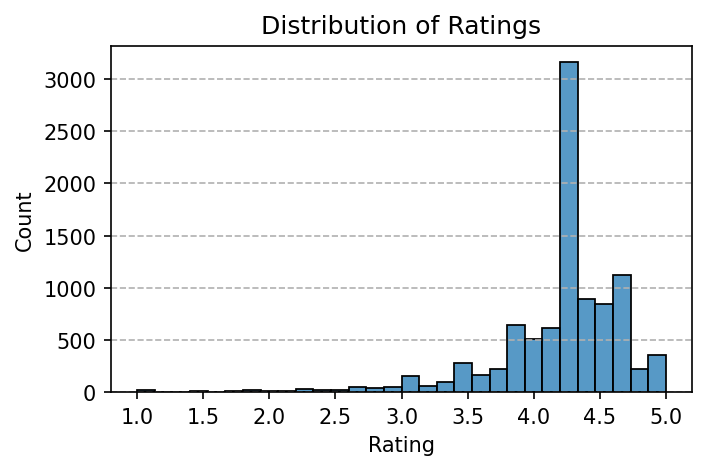

In [67]:
# Display Rating
plt.figure(figsize=(5,3), dpi=150)
sns.histplot(google_play_store_df["Rating"], bins=30)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--")

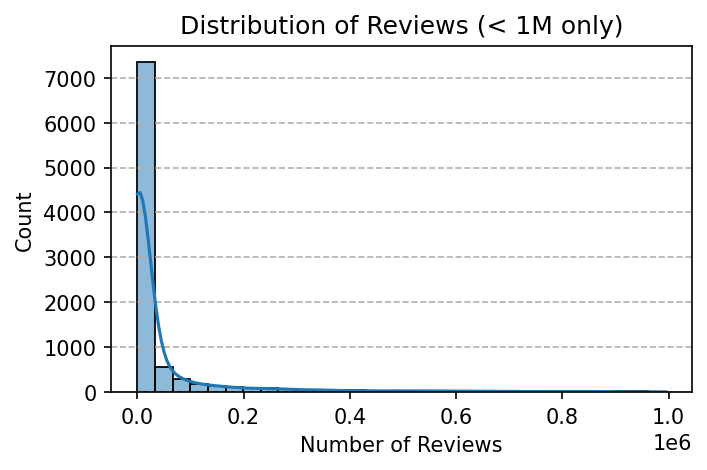

In [68]:
# Filter apps with review counts under 1M
subset = google_play_store_df[google_play_store_df["Reviews"] < 1_000_000]

plt.figure(figsize=(5, 3), dpi=150)
sns.histplot(subset["Reviews"], bins=30, kde=True)
plt.title("Distribution of Reviews (< 1M only)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--")

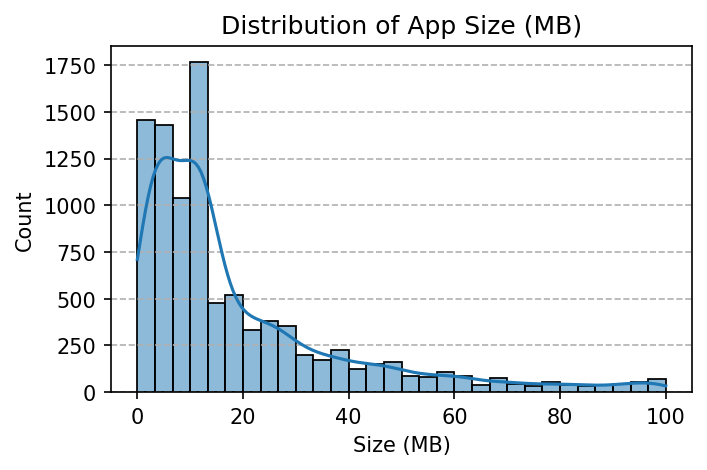

In [69]:
# Plot Size in MB
size_mb = google_play_store_df["Size"] / 1_000_000 # recall that I've converted Size to bytes in above, so divide by 10^6 to convert it MB in here

plt.figure(figsize=(5,3), dpi=150)
sns.histplot(size_mb, bins=30, kde=True)
plt.title("Distribution of App Size (MB)")
plt.xlabel("Size (MB)")
plt.ylabel("Count")
plt.grid(axis="y", ls="--")

In [70]:
# number of free apps
len(google_play_store_df[google_play_store_df["Price"] == 0])

8894

In [71]:
# percentage of free apps
7588 / len(google_play_store_df) * 100

78.65657717425107

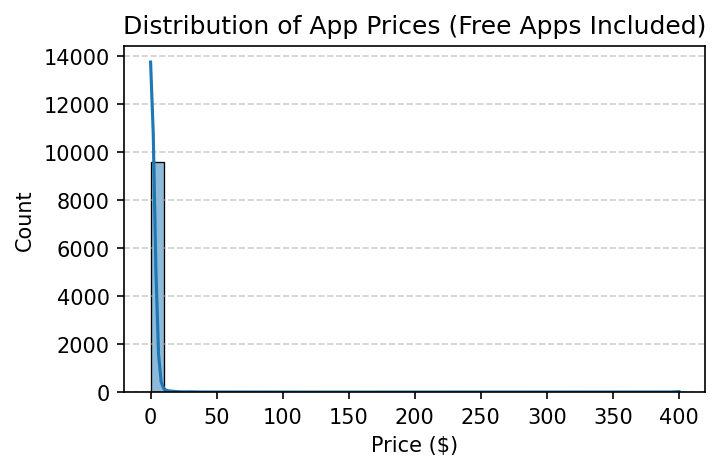

In [72]:
# Plot Price (free apps are also included)
plt.figure(figsize=(5, 3), dpi=150)
sns.histplot(google_play_store_df["Price"], bins=40, kde=True)
plt.title("Distribution of App Prices (Free Apps Included)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

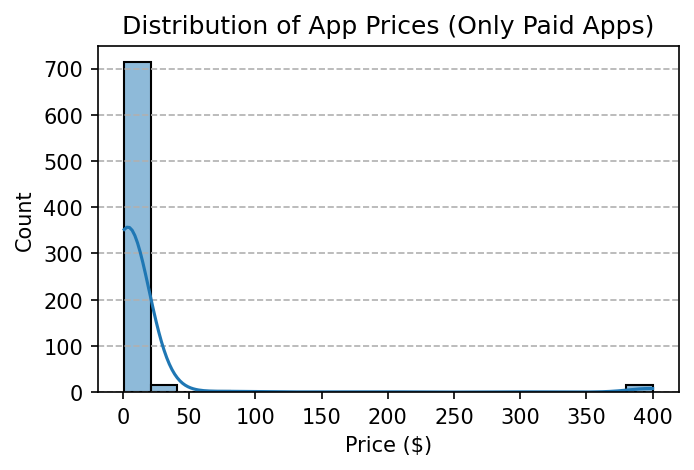

In [73]:
# Plot unfree apps (filtered)
paid_df = google_play_store_df[google_play_store_df["Price"] != 0]
plt.figure(figsize=(5, 3), dpi=150)
sns.histplot(paid_df["Price"], bins=20, kde=True)
plt.title("Distribution of App Prices (Only Paid Apps)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--")
plt.show()

# Part IV - Research Queries and Analytical Insights

## 4.1. What are the top categories in terms of the number of apps?

In [74]:
# Sort Category column based on the frequency, and store it as a pandas Series
category_counts = google_play_store_df["Category"].value_counts().sort_values(ascending=False)
top_5_categories = category_counts.head(5)
top_5_categories

,count
Category,
FAMILY,1828
GAME,959
TOOLS,824
BUSINESS,420
MEDICAL,395


/tmp/ipython-input-1409173507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_categories.index,


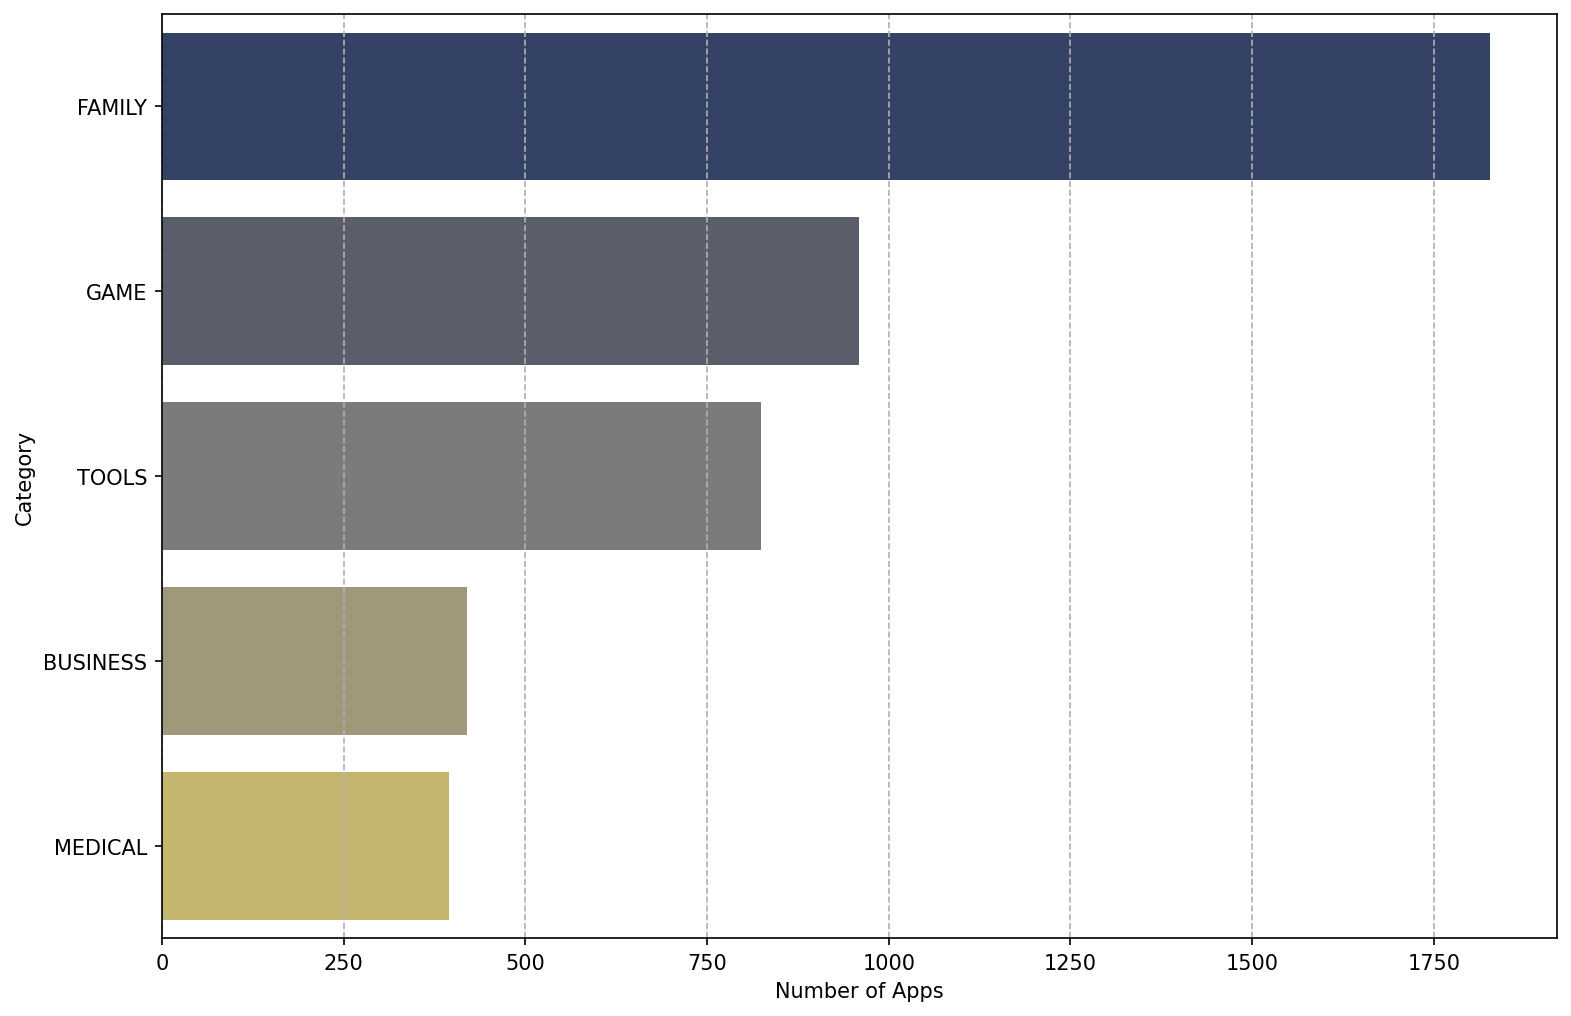

In [75]:
# Visualize Count vs Category
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(y=top_5_categories.index,
            x=top_5_categories.values,
            palette="cividis")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.grid(axis="x", ls="--")

In [76]:
# percentage of top 3 categories
round(float(top_5_categories.head(3).values.sum() / len(google_play_store_df) * 100), 2)

37.43

The top category is clearly FAMILY, with 1829 apps. GAME and TOOLS are also important categories based on their frequency. Together, these three categories make up nearly 37% of all the apps. In contrast, PARENTING, COMICS and BEAUTY have significantly fewer apps.

## 4.2. What is the distribution of ratings by application type?

In [77]:
google_play_store_df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [78]:
google_play_store_df["Rating"].mean()

np.float64(4.192474344355759)

In [79]:
google_play_store_df.groupby("Type")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8894.0,4.186092,0.495654,1.0,4.0,4.3,4.5,5.0
Paid,753.0,4.267862,0.501570,1.0,4.2,4.3,4.6,5.0


/tmp/ipython-input-3739883697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type", y="Rating", data=google_play_store_df, palette="cividis")


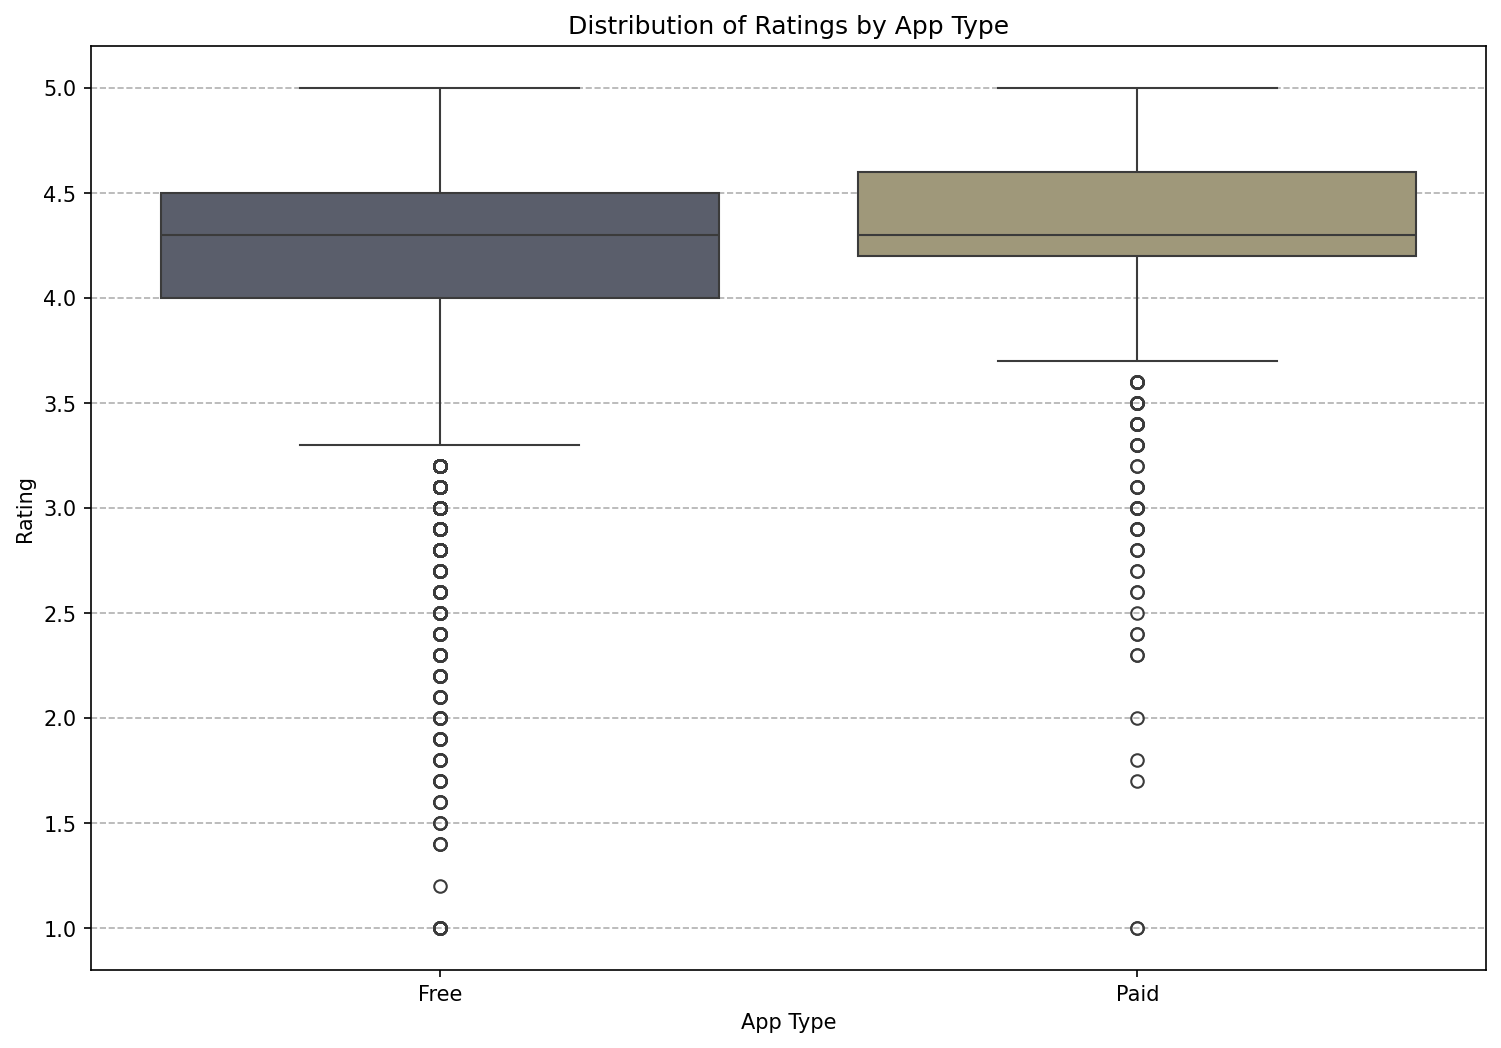

In [80]:
plt.figure(figsize=(12, 8), dpi=150)
sns.boxplot(x="Type", y="Rating", data=google_play_store_df, palette="cividis")
plt.title("Distribution of Ratings by App Type")
plt.xlabel("App Type")
plt.ylabel("Rating")
plt.grid(axis="y", linestyle="--")

Both Free and Paid apps generally receive high ratings, mostly between 4.0 and 4.5. Paid apps have a slightly higher median rating and less variation, showing that users rate them more consistently. Free apps, however, display a wider spread with more low-rating outliers, indicating varying quality levels. Overall, Paid apps tend to be rated more favorably and reliably than Free ones.

## 4.3. What are the categories of ratings and their counts?

I classified the rating categories as follows:

[0,2] -> Poor

[2,3] -> Below Average

[3-4] -> Average

[4-4.5] -> Good

[4.5-5] -> Exceptional

In [81]:
ratings_cat = pd.cut(google_play_store_df["Rating"],
                     bins = [0, 2, 3, 4, 4.5, 5],
                     labels = ["Poor", "Below Average", "Average", "Good", "Exceptional"])

In [82]:
ratings_cat.value_counts().sort_index()

,count
Rating,
Poor,66
Below Average,294
Average,2061
Good,5524
Exceptional,1702


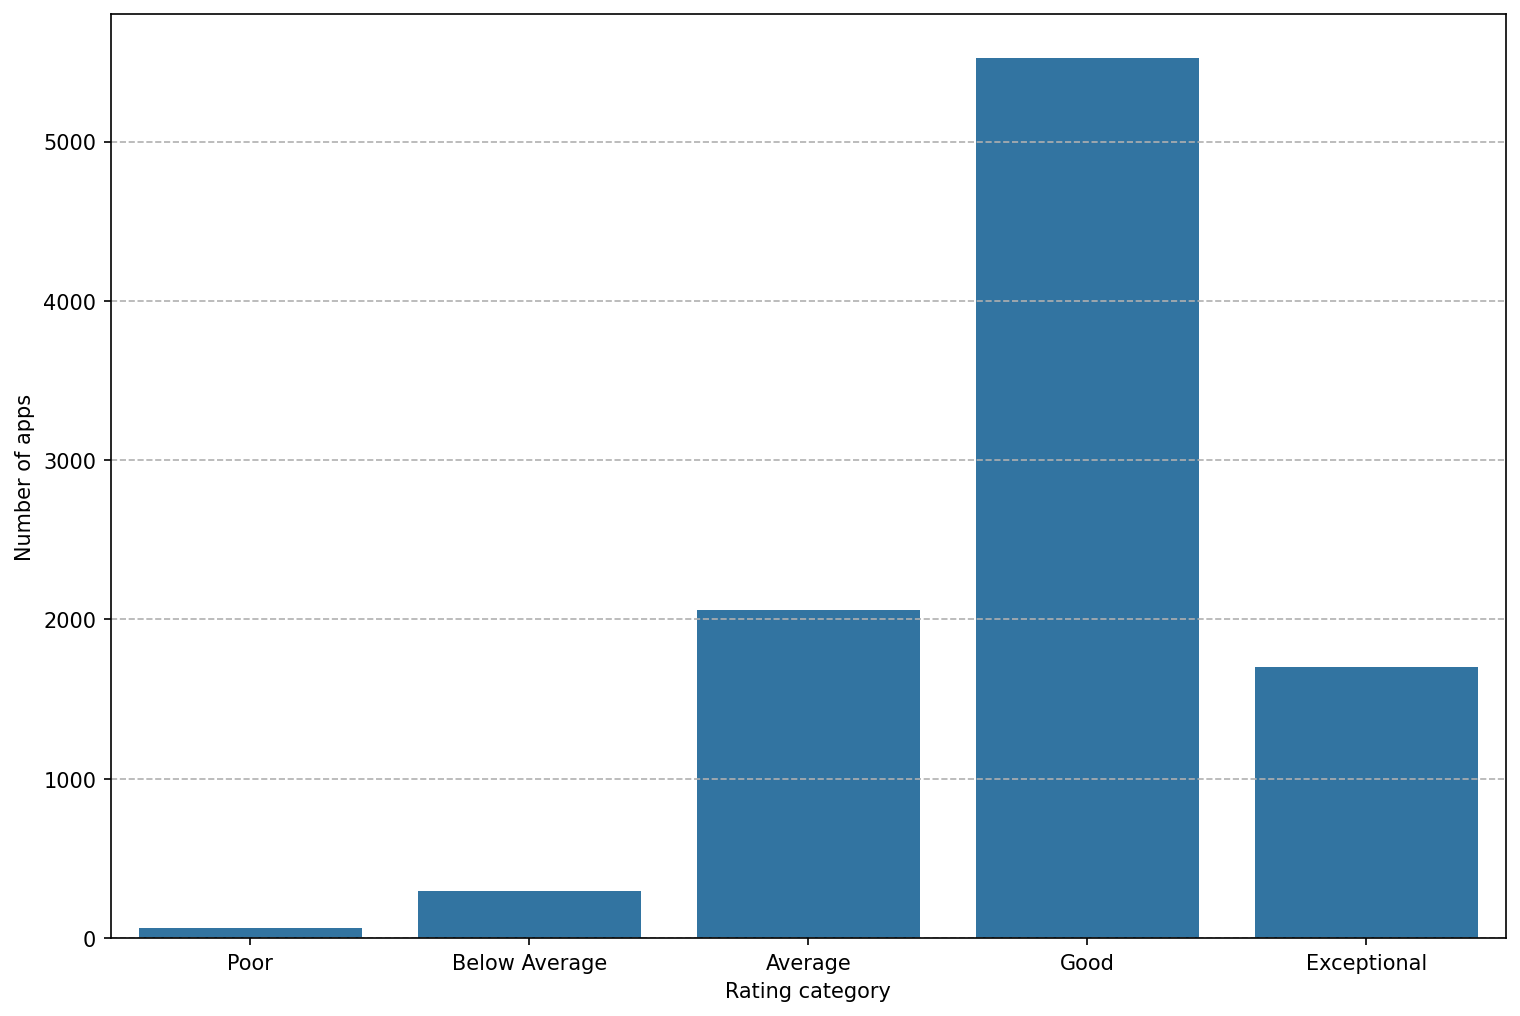

In [83]:
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(ratings_cat.value_counts().sort_index())
plt.xlabel("Rating category")
plt.ylabel("Number of apps")
plt.grid(axis="y", ls="--")

Most apps fall into the Good (4.0–4.5) category, followed by a smaller portion rated as Exceptional (4.5–5). Only a few apps are rated Average or below, showing that user ratings are generally positive. This indicates that most applications on Google Play maintain decent user satisfaction. Poorly rated apps are rare, suggesting low-quality apps are quickly removed or updated.

## 4.4. How does content rating affect user ratings in apps?

In [84]:
# Display unique values for Content Rating feature
google_play_store_df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [85]:
# Group ratings by content ratings and display descriptive statistics
google_play_store_df.groupby(by="Content Rating")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Content Rating,,,,,,,,
Adults only 18+,3.0,4.300000,0.435890,3.8,4.15,4.5,4.55,4.6
Everyone,7893.0,4.188091,0.513781,1.0,4.00,4.3,4.50,5.0
Everyone 10+,322.0,4.229814,0.388999,1.8,4.10,4.3,4.50,5.0
Mature 17+,393.0,4.138168,0.488092,1.0,4.00,4.2,4.40,5.0
Teen,1036.0,4.234556,0.379884,2.0,4.10,4.3,4.50,5.0


/tmp/ipython-input-1050134948.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_by_content.index, y=rating_by_content.values, palette="cividis")


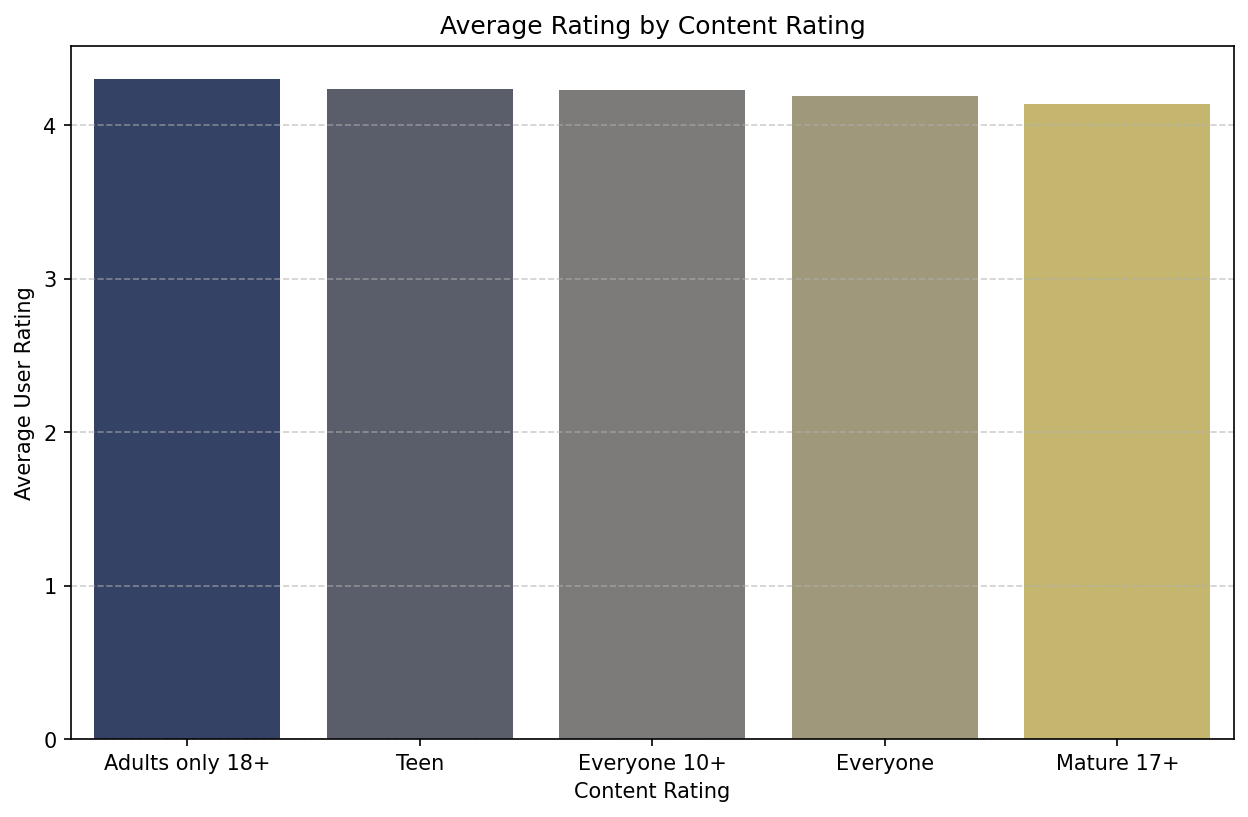

In [86]:
# Compute mean rating for each content rating
rating_by_content = google_play_store_df.groupby("Content Rating")["Rating"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=rating_by_content.index, y=rating_by_content.values, palette="cividis")
plt.title("Average Rating by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Average User Rating")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


/tmp/ipython-input-2029942744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Content Rating", y="Rating", data=google_play_store_df, palette="cividis")


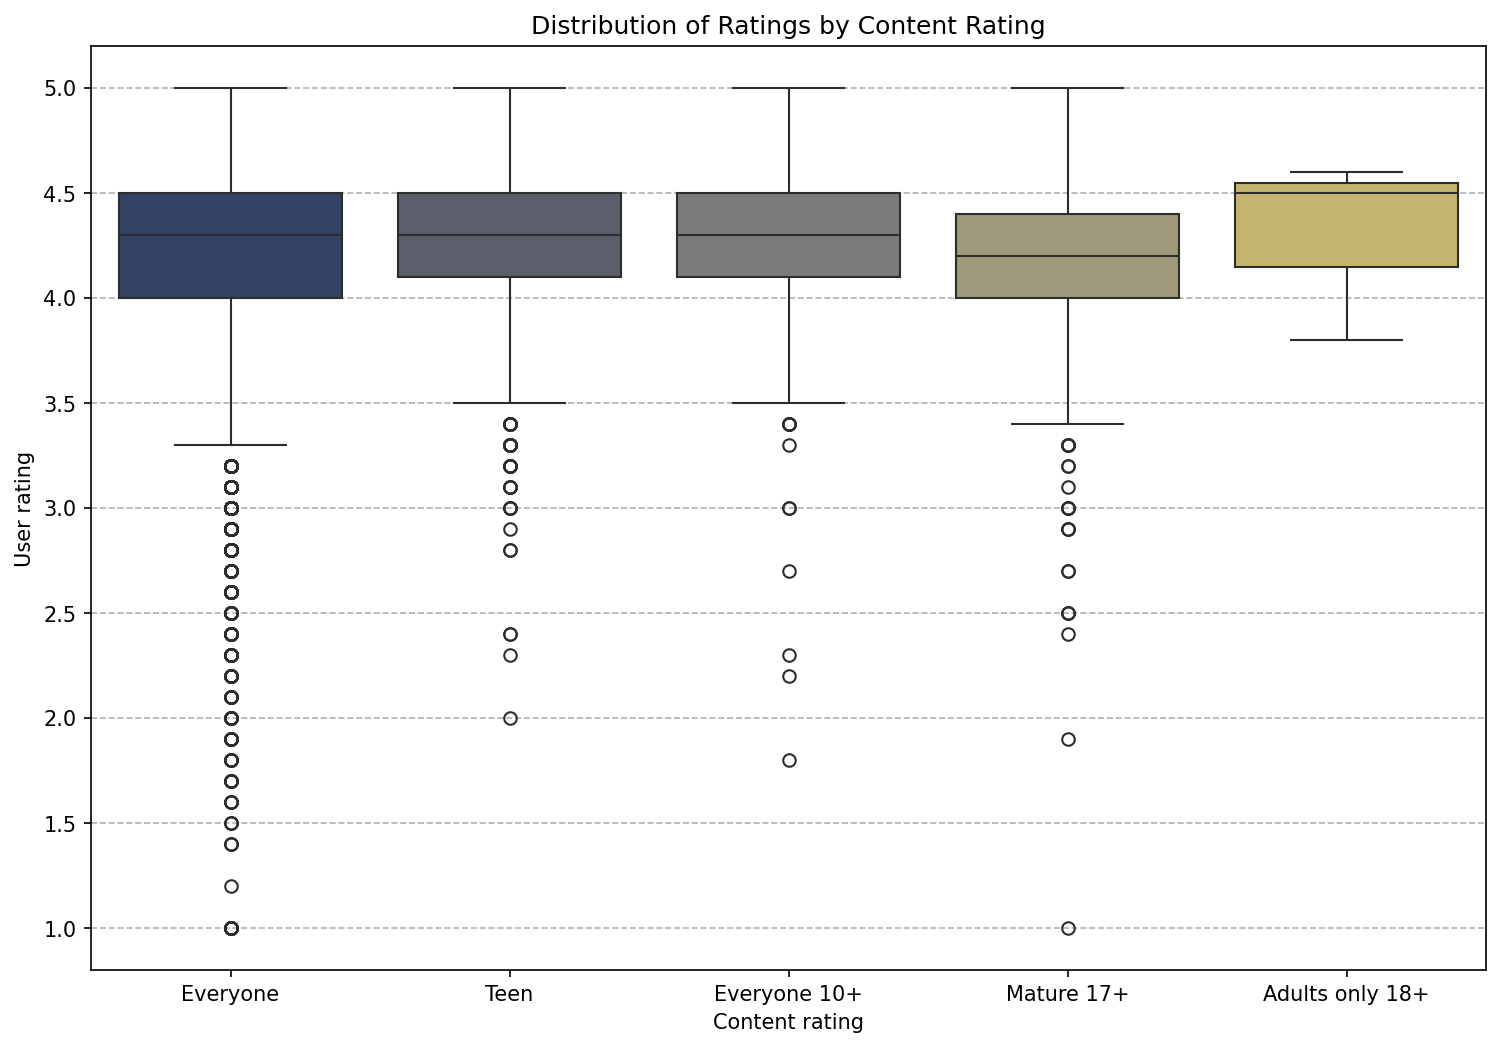

In [87]:
# boxplot
plt.figure(figsize=(12, 8), dpi=150)
sns.boxplot(x="Content Rating", y="Rating", data=google_play_store_df, palette="cividis")
plt.title("Distribution of Ratings by Content Rating")
plt.xlabel("Content rating")
plt.ylabel("User rating")
plt.grid(axis="y", ls="--")

Most apps, no matter their content rating, have high user ratings around 4.2–4.3. Apps rated Everyone, Teen, and Everyone 10+ receive slightly higher and more consistent ratings, showing that they are well accepted by general users.
Mature 17+ and Adults only 18+ apps have similar or a bit lower ratings, probably because they serve smaller and more specific audiences.
In general, content rating does not change user satisfaction much. Most apps are rated positively.

## 4.5. What is the number of applications in each category?

In [88]:
# category_counts was created in section 4.1.
category_counts

,count
Category,
FAMILY,1828
GAME,959
TOOLS,824
BUSINESS,420
MEDICAL,395
PRODUCTIVITY,374
PERSONALIZATION,374
LIFESTYLE,369
FINANCE,345


/tmp/ipython-input-3193641734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = category_counts.values, y = category_counts.index, palette="cividis")


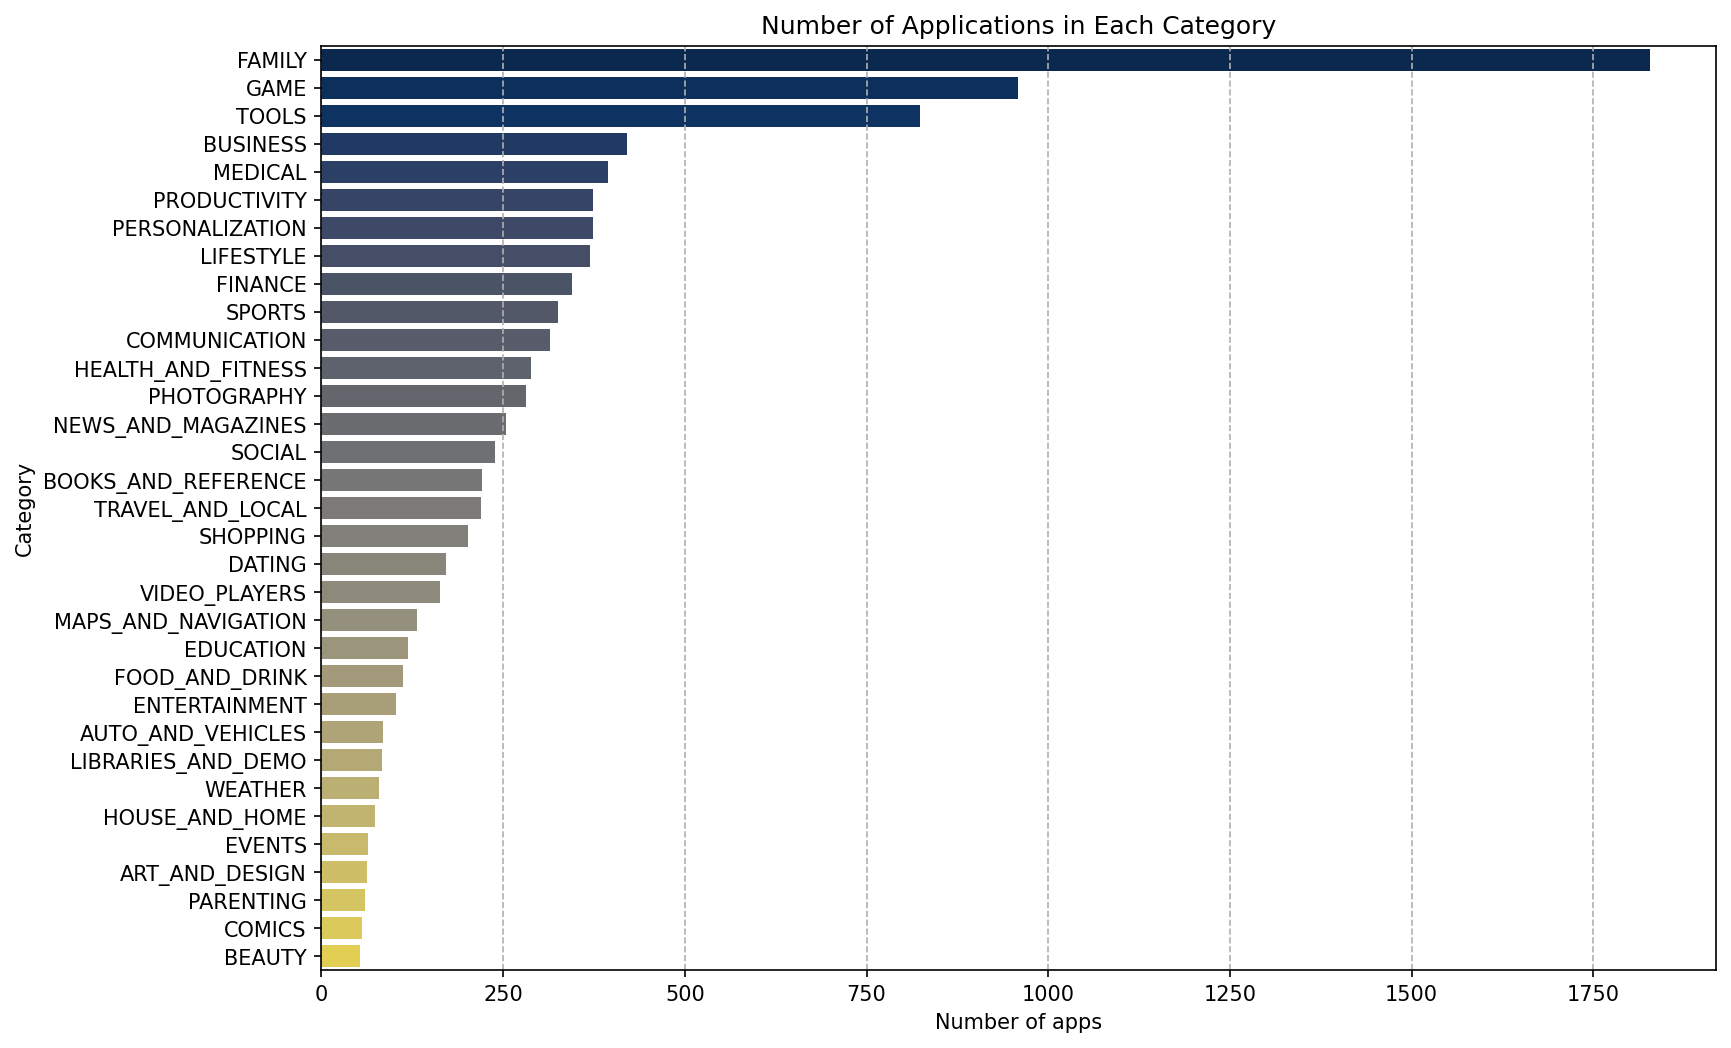

In [89]:
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(x = category_counts.values, y = category_counts.index, palette="cividis")
plt.title("Number of Applications in Each Category")
plt.xlabel("Number of apps")
plt.ylabel("Category")
plt.grid(axis="x", ls="--")

The Family category has the highest number of apps (1,828), followed by Game (959) and Tools (824). These categories are the most common because they attract a broad audience and are useful in daily life. Categories like Beauty, Comics, and Parenting have the fewest apps, showing that fewer developers focus on them. Overall, most apps in the Google Play Store belong to entertainment or utility categories that serve large user groups.

## 4.6. Which categories have the highest total spending in apps?

In [90]:
cat_vs_total_spending = google_play_store_df.groupby("Category")["Price"].sum().sort_values(ascending=False)
cat_vs_total_spending

,Price
Category,
FINANCE,2900.83
FAMILY,2398.87
LIFESTYLE,2360.87
MEDICAL,995.70
GAME,284.31
TOOLS,266.26
PRODUCTIVITY,250.93
BUSINESS,175.29
PERSONALIZATION,148.99


/tmp/ipython-input-3509087164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cat_vs_total_spending.values, y = cat_vs_total_spending.index, palette="cividis")


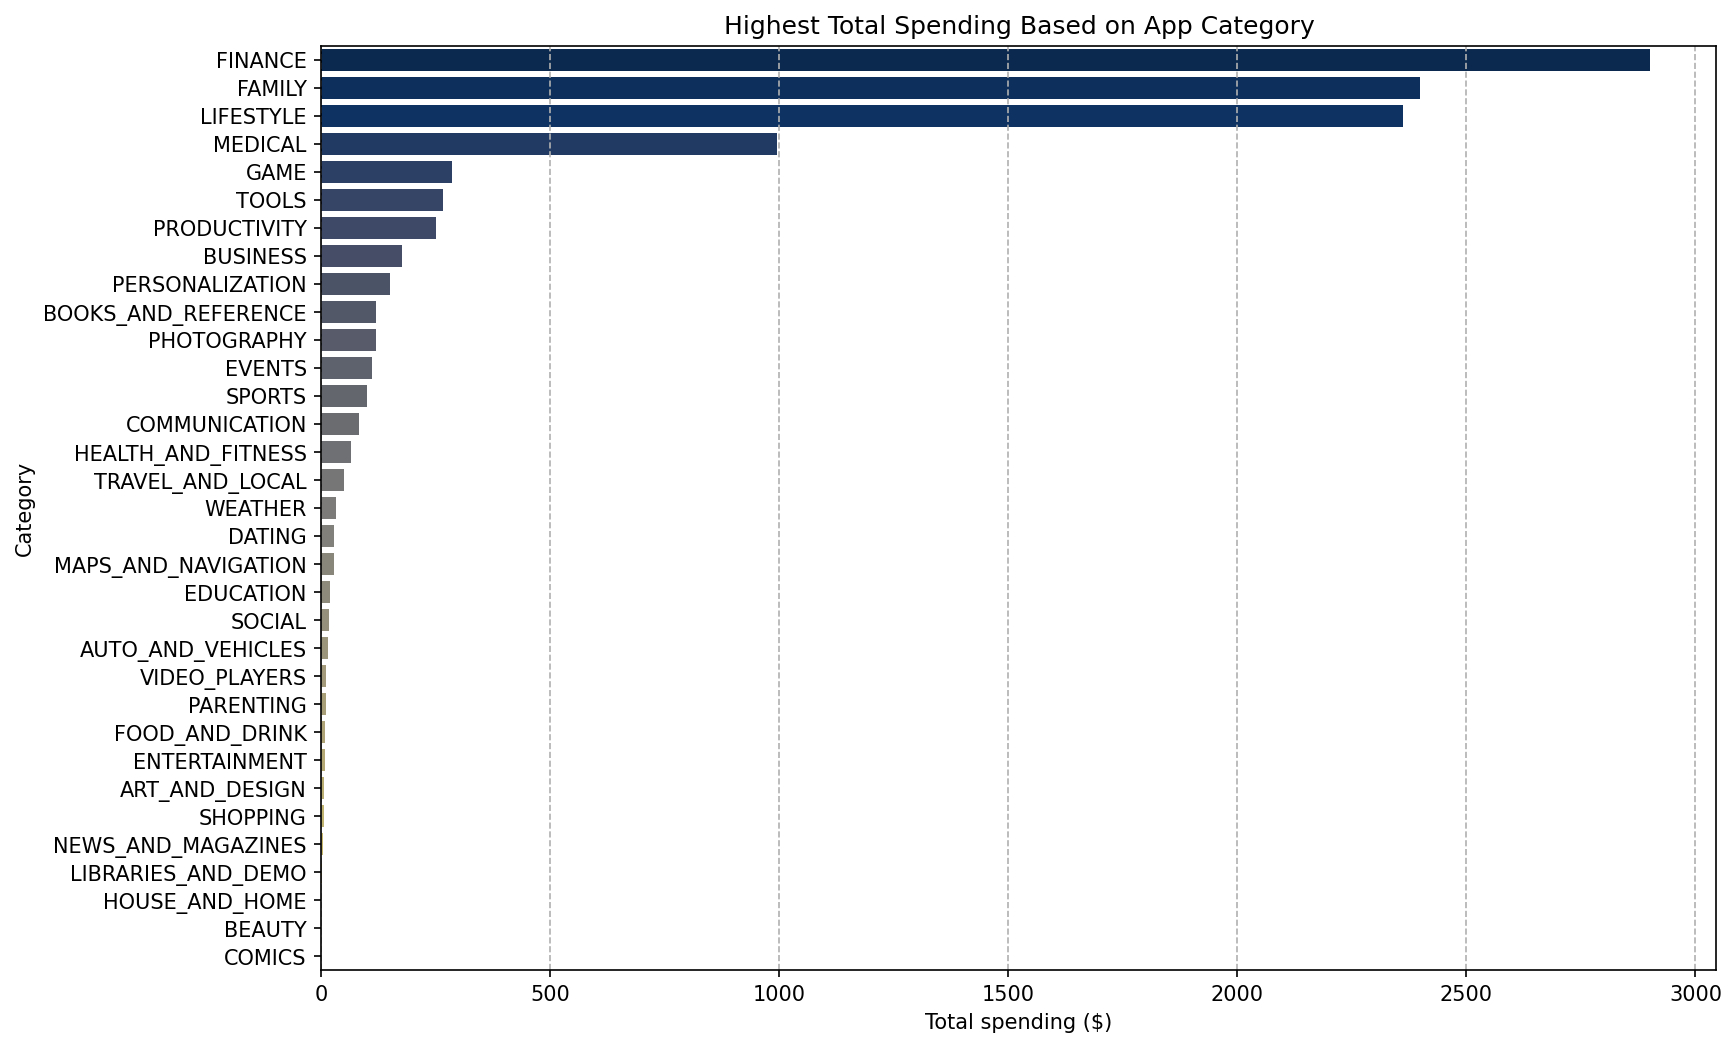

In [91]:
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(x = cat_vs_total_spending.values, y = cat_vs_total_spending.index, palette="cividis")
plt.title("Highest Total Spending Based on App Category")
plt.xlabel("Total spending ($)")
plt.ylabel("Category")
plt.grid(axis="x", ls="--")

Categories with the highest total listed prices are Finance, Family, and Lifestyle. On the other hand, Comics, Beauty and House and Home categories have no total spending. It is also surprising that Games have not so much spending.

## 4.7. What are the most common words in the names of Google Play Store apps?

In [92]:
def create_word_frequency_dict(df):
  frequency_dict = {}
  for i in range(len(df)):
    curr_sample = df.iloc[i] # i'th sample
    app_name = curr_sample["App"] # app name as str
    temp_list = app_name.split() # split the app name into list of tokens
    word_list = [s.lower() for s in temp_list if s.isalpha() and len(s) > 0] # take words from the temp_list (i.e., if s is a word, append to the word_list)
    for word in word_list: # iterate over list of words
      if word not in frequency_dict:
        frequency_dict[word] = 1 # first occurence of word => set its frequency as 1
      else:
        frequency_dict[word] = frequency_dict[word] + 1 # if the word is there, increment its counter by one
  return frequency_dict

In [93]:
word_frequency_dict = create_word_frequency_dict(google_play_store_df)

In [94]:
word_frequency_df = pd.DataFrame.from_dict(word_frequency_dict, orient="index")
word_frequency_df.head()

,0
photo,133
editor,92
candy,12
camera,105
grid,4


In [95]:
# set a proper column name
word_frequency_df.rename(columns={0 : "Count"}, inplace=True)

In [96]:
word_frequency_df

,Count
photo,133
editor,92
candy,12
camera,105
grid,4
...,...
schmitz,1
parkinson,1
exercices,1
scp,1


In [97]:
word_frequency_df.sort_values(by="Count", ascending=False, inplace=True)
word_frequency_df

,Count
for,511
free,374
app,251
and,250
the,239
...,...
ambarnath,1
plmgss,1
fieldbi,1
pune,1


In [98]:
word_frequency_df = word_frequency_df.reset_index().rename(columns={"index":"Word"})
word_frequency_df

,Word,Count
0,for,511
1,free,374
2,app,251
3,and,250
4,the,239
...,...,...
7537,ambarnath,1
7538,plmgss,1
7539,fieldbi,1
7540,pune,1


In [99]:
top_50_frequent_words = word_frequency_df.head(50)
top_50_frequent_words

,Word,Count
0,for,511
1,free,374
2,app,251
3,and,250
4,the,239
5,mobile,204
6,pro,184
7,video,159
8,live,151
9,of,145


In [ ]:
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(top_50_frequent_words, y="Word", x="Count", palette="cividis")
plt.title("Most Common Words in App Names (Top 50)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.grid(axis="x", ls="--")

/tmp/ipython-input-267508842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_50_frequent_words, y="Word", x="Count", palette="cividis")


The most frequent words in app names are “for”, “free”, and “app”, showing that many developers highlight usability and cost in titles. Words like “mobile”, “pro”, and “video” also appear often, which reflects the popularity of mobile tools and multimedia apps. Other common terms such as “photo”, “chat”, and “game” indicate that communication and entertainment are key themes in the Google Play Store.

## 4.8. Which categories show low installs but high ratings?

In [ ]:
google_play_store_df["Rating"].value_counts().sort_values(ascending=False)